In [1]:


































































































































































import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
from shapely.geometry import Point
from tqdm import tqdm
tqdm.pandas(desc="CRS transformation")

In [2]:
import contextily as ctx

In [3]:
DMA_shp_path = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\DMA\DMA shape file\DMA.shp"
flood_shp_path = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\Recorded_Flood_Outlines\Recorded_Flood_OutlinesPolygon.shp"

In [4]:
DMA_shp = gpd.read_file(DMA_shp_path)
DMA_shp = DMA_shp.to_crs(epsg=3857)
flood_shp = gpd.read_file(flood_shp_path)
flood_shp = flood_shp.to_crs(epsg = 3857)

In [61]:
flood_shp['start_date'] = pd.to_datetime(flood_shp['start_date'])

# Filter the DataFrame for records starting from 2020 onwards
flood_shp_start2020 = flood_shp[flood_shp['start_date'] >= '2020-01-01'].reset_index(drop = True)
flood_shp_start2020 = flood_shp_start2020.sort_values(by = 'start_date').reset_index(drop = True)

In [62]:
num = len(flood_shp_start2020)
num

883

In [63]:
flood_shp_start2020 = flood_shp_start2020.drop_duplicates().reset_index(drop = True)
num = len(flood_shp_start2020)
num

861

In [65]:
flood_shp_start2020['flood_id'] = range(1,len(flood_shp_start2020)+1)

In [66]:
# Extract the year from the 'start_date' column
flood_shp_start2020['year'] = flood_shp_start2020['start_date'].dt.year

# Count the number of records for each year
year_counts = flood_shp_start2020['year'].value_counts().sort_index()

# Display the counts for 2020, 2021, and 2022
year_counts.loc[[2020, 2021, 2022,2023,2024]]

year
2020    337
2021    123
2022     65
2023    223
2024    113
Name: count, dtype: int64

In [67]:
flood_shp_start2020.columns

Index(['rec_out_id', 'rec_grp_id', 'name', 'start_date', 'end_date',
       'flood_src', 'flood_caus', 'fm_status', 'hfm_status', 'data_src',
       'fluvial_f', 'coastal_f', 'tidal_f', 'data_prov', 'data_qual',
       'geometry', 'flood_id', 'year'],
      dtype='object')

In [68]:
flood_by_years = {}
years = [2020,2021,2022,2023,2024]
for year in years:
    flood_by_years[year] = flood_shp_start2020[flood_shp_start2020['year']==year].reset_index(drop = True)
for year, gdf in flood_by_years.items():
    print(f"{year} flood records {len(gdf)}")

2020 flood records 337
2021 flood records 123
2022 flood records 65
2023 flood records 223
2024 flood records 113


In [73]:
overlap_all = {}
for year in years:
    overlap_all[year] = gpd.overlay(DMA_shp,flood_by_years[year], how = 'intersection')
    overlap_all[year] = overlap_all[year].dissolve(by='flood_id')
for year, gdf in overlap_all.items():
    print(f"{year} overlap flood is {len(gdf)}")

2020 overlap flood is 13
2021 overlap flood is 0
2022 overlap flood is 0
2023 overlap flood is 160
2024 overlap flood is 88


In [71]:
overlap = gpd.overlay(DMA_shp,flood_shp_start2020, how = 'intersection')

In [82]:
DMA_buffer_5km = DMA_shp.buffer(5000)
DMA_buffer_5km_gdf = gpd. GeoDataFrame(geometry = DMA_buffer_5km, crs = DMA_shp.crs)
overlap_5km = gpd.overlay(DMA_buffer_5km_gdf,flood_shp_start2020, how = 'intersection')

In [92]:
flood_id_overlap = set(overlap['flood_id'])
flood_id_overlap_5km = set(overlap_5km['flood_id'])
additional_5km = flood_id_overlap_5km - flood_id_overlap
additional_flood_5km = overlap_5km[overlap_5km['flood_id'].isin(additional_5km)]
additional_flood_5km = additional_flood_5km.dissolve(by = 'flood_id')
num = len(additional_flood_5km)
num

4

In [93]:
DMA_buffer_10km = DMA_shp.buffer(10000)
DMA_buffer_10km_gdf = gpd. GeoDataFrame(geometry = DMA_buffer_10km, crs = DMA_shp.crs)
overlap_10km = gpd.overlay(DMA_buffer_10km_gdf,flood_shp_start2020, how = 'intersection')

In [98]:
flood_id_overlap_10km = set(overlap_10km['flood_id'])
additional_10km = flood_id_overlap_10km - flood_id_overlap
additional_flood_10km = overlap_10km[overlap_10km['flood_id'].isin(additional_10km)]
additional_flood_10km = additional_flood_10km.dissolve(by = 'flood_id')
num = len(additional_flood_10km)
num

5

In [96]:
DMA_buffer_20km = DMA_shp.buffer(20000)
DMA_buffer_20km_gdf = gpd. GeoDataFrame(geometry = DMA_buffer_20km, crs = DMA_shp.crs)
overlap_20km = gpd.overlay(DMA_buffer_20km_gdf,flood_shp_start2020, how = 'intersection')

In [99]:
flood_id_overlap_20km = set(overlap_20km['flood_id'])
additional_20km = flood_id_overlap_20km - flood_id_overlap
additional_flood_20km = overlap_20km[overlap_20km['flood_id'].isin(additional_20km)]
additional_flood_20km = additional_flood_20km.dissolve(by = 'flood_id')
num = len(additional_flood_20km)
num

32

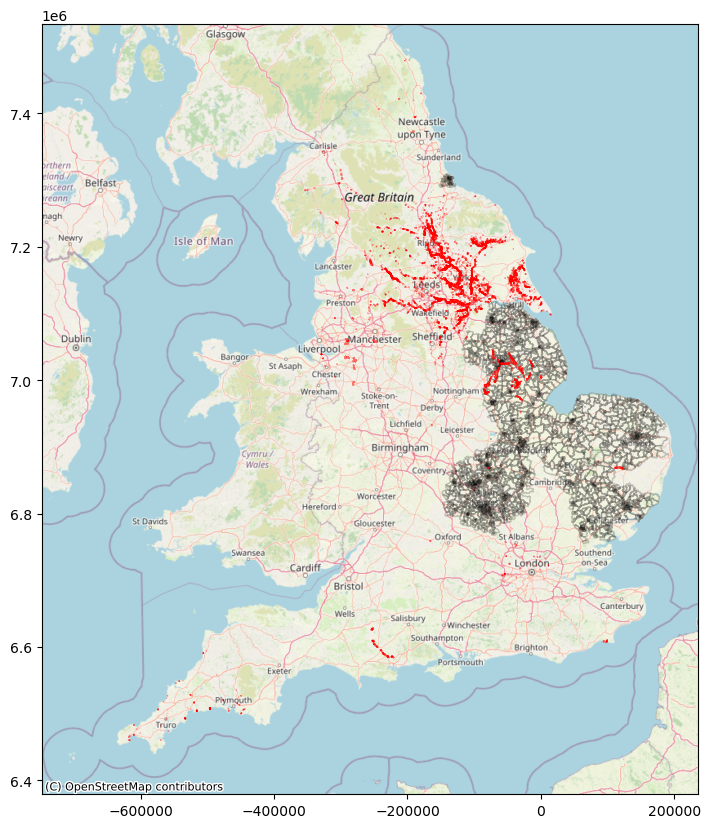

In [70]:
fig,ax = plt.subplots(figsize = (10,10))
DMA_shp.plot(ax=ax,color='lightyellow',edgecolor='black', alpha = 0.2)
flood_shp_start2020.plot(ax=ax,color='lightyellow',edgecolor='red', alpha = 0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

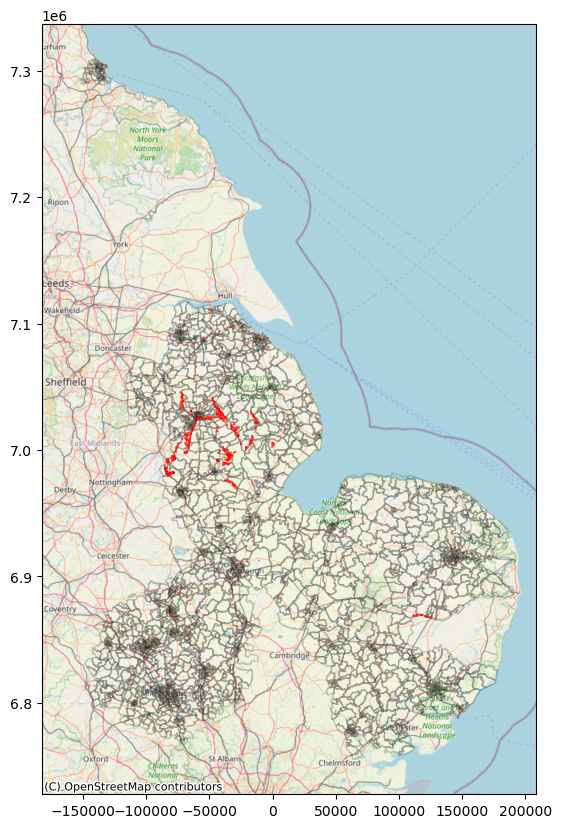

In [72]:
fig,ax = plt.subplots(figsize = (10,10))
DMA_shp.plot(ax=ax,color='lightyellow',edgecolor='black', alpha = 0.2)
overlap.plot(ax=ax,color='lightyellow',edgecolor='red', alpha = 0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

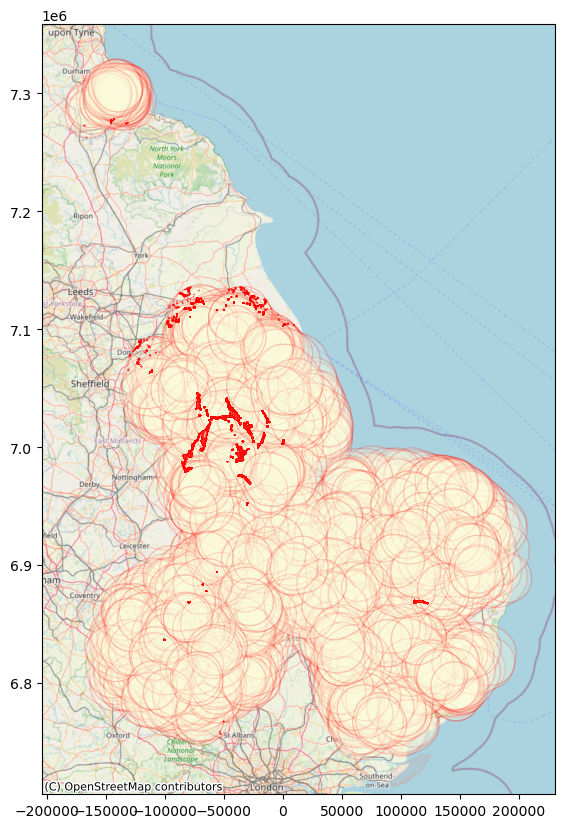

In [100]:
fig,ax = plt.subplots(figsize = (10,10))
# DMA_shp.plot(ax=ax,color='lightyellow',edgecolor='black', alpha = 0.2)
DMA_buffer_20km_gdf.plot(ax=ax,color='lightyellow',edgecolor='red', alpha = 0.2)
overlap_20km.plot(ax=ax,color='lightyellow',edgecolor='red', alpha = 0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()